In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from typing import Dict, List
import time
import pandas as pd
from idlmam import *

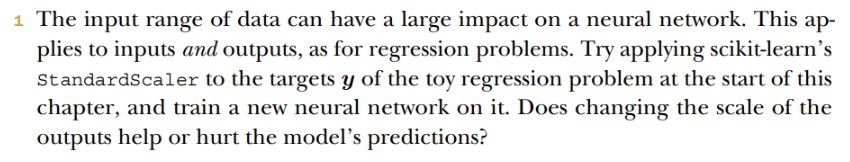

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]/home/morshdy/miniconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch: 100%|██████████| 50/50 [00:19<00:00,  2.54it/s]


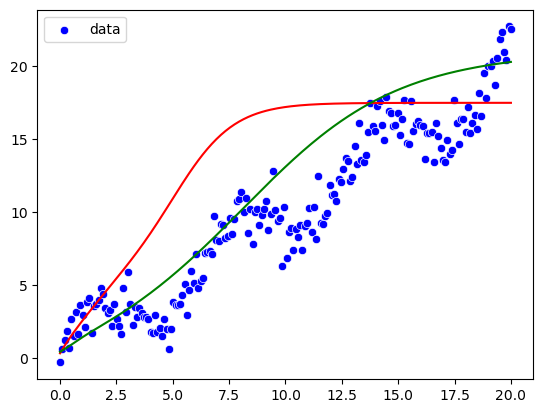

In [72]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"

X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

sns.scatterplot(x=X, y=y, color='blue', label='data')
def task1(X, y, color, transform=None):
    model = nn.Sequential(
        nn.Linear(1, 10),
        nn.Tanh(),
        nn.Linear(10, 1)
    )

    if transform:
        scalar = StandardScaler()
        y = scalar.fit_transform(y.reshape(-1, 1))

    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    loss_fn = torch.nn.MSELoss()

    train_dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
    trainloader = DataLoader(train_dataset)
    train_simple_network(model, loss_fn, optimizer, trainloader, epochs=50, device='cuda')

    with torch.inference_mode():
        if transform:
            y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float32, device='cuda')).cpu().numpy()
            y_pred = scalar.inverse_transform(y_pred)
        else:
            y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float32, device='cuda')).cpu().numpy()

    sns.lineplot(x=X, y=y_pred.ravel(), color=color)

task1(X, y, "red")
task1(X, y, "green", transform=True)